In [1]:
import pandas as pd
import numpy as np

# outlier detection

In [2]:
def load_csv(file_path):
    return pd.read_csv(file_path)

def detect_continuous_outliers_zscore(df, column, threshold=3):
    mean = df[column].mean()
    std = df[column].std()
    df['Z_Score'] = (df[column] - mean) / std
    outliers = df[np.abs(df['Z_Score']) > threshold]
    return outliers

def continuous_outlier_analysis(df, columns, threshold=3):
    outlier_dict = {}
    for column in columns:
        print(f"Analyzing column: {column}")
        outliers = detect_continuous_outliers_zscore(df, column, threshold)
        outlier_dict[column] = outliers
    return outlier_dict

def discrete_outliers_frequency(df, column, threshold_ratio=0.05):
    value_counts = df[column].value_counts(normalize=True)
    outliers = value_counts[value_counts < threshold_ratio]
    outlier_rows = df[df[column].isin(outliers.index)]
    return outliers, outlier_rows

def discrete_outlier_analysis(df, columns, threshold_ratio=0.05):
    outlier_dict = {}
    for column in columns:
        print(f"Analyzing column: {column}")
        outliers, outlier_rows = discrete_outliers_frequency(df, column, threshold_ratio)
        outlier_dict[column] = {'outliers': outliers, 'outlier_rows': outlier_rows}
    return outlier_dict

In [ ]:
file_path = 'data.csv'

continuous_columns_to_analyze = ['Quantity', 'Price', 'Value', 'DoneVolume', 'DoneValue']
discrete_columns_to_analyze = ['AccID', 'AccCode', 'SecID', 'SecCode', 'Exchange', 'Destination', 'OrderGiver', 'OrderTakerUserCode', 'OriginOfOrder']

df = load_csv(file_path)

continuous_outliers = continuous_outlier_analysis(df, continuous_columns_to_analyze)

for column, outlier_data in continuous_outliers.items():
    print(f"Outliers in {column}:")
    print(outlier_data)

discrete_outliers = discrete_outlier_analysis(df, discrete_columns_to_analyze)

for column, data in discrete_outliers.items():
    print(f"Outliers in {column}:")
    print(f"Outlier values and their frequencies:\n{data['outliers']}")
    print(f"Rows with outliers in {column}:\n{data['outlier_rows']}")

# anomaly detection

C:\Users\david\AppData\Local\Temp\ipykernel_28108\3050505763.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['anomaly'] = features['anomaly']


Number of Anomalies Detected: 49
      Quantity       Price  SecCode_ACDC  SecCode_BHP  SecCode_CBA  \
69          29    1.100542         False        False        False   
181        696    2.386370         False         True        False   
210         48    1.009949         False        False        False   
304        337  115.076582         False        False        False   
401          8  113.654831         False         True        False   
652      15999    1.460507         False        False        False   
741        296    4.479510         False        False        False   
974       1166    5.731633         False        False         True   
1000       943    5.278110         False        False         True   
1015       143  110.979979         False        False         True   
1041      1281    4.631164         False        False         True   
1097       322  111.809023         False        False         True   
1164       367    4.300842         False        False    

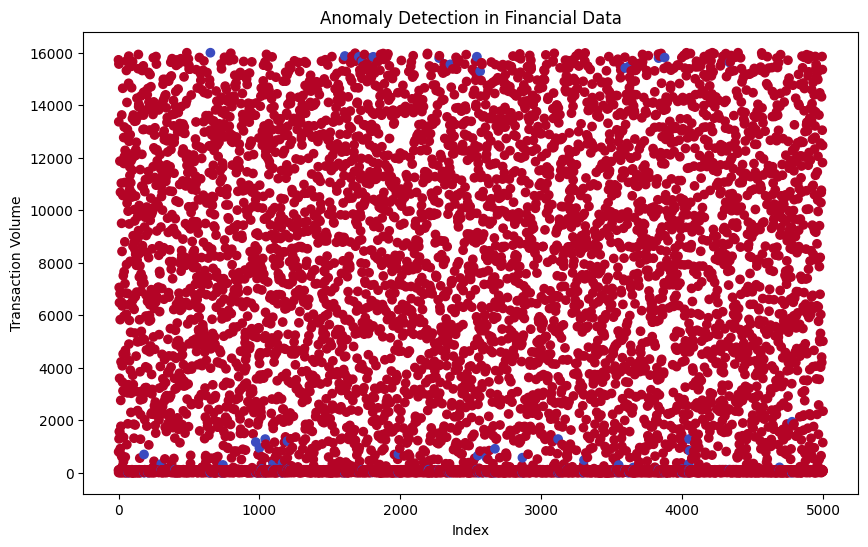

In [17]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

subset = df[['Quantity', 'Price', 'SecCode']]
features = pd.get_dummies(subset, columns=['SecCode'])
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
model.fit(features)
features['anomaly'] = model.predict(features)
subset['anomaly'] = features['anomaly']
anomalies = features[features['anomaly'] == -1]
print(f"Number of Anomalies Detected: {len(anomalies)}")
print(anomalies)

plt.figure(figsize=(10, 6))
plt.scatter(features.index, features['Quantity'], c=features['anomaly'], cmap='coolwarm')
plt.scatter(features.index, features['Price'], c=features['anomaly'], cmap='coolwarm')
plt.title('Anomaly Detection in Financial Data')
plt.xlabel('Index')
plt.ylabel('Transaction Volume')
plt.show()

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

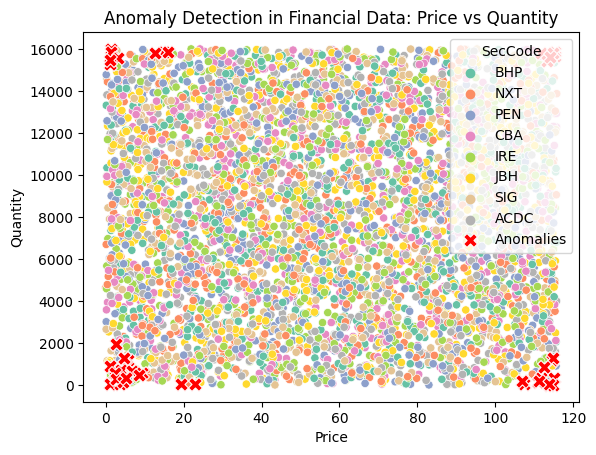

In [20]:
import seaborn as sns

sns.scatterplot(
    x='Price', 
    y='Quantity', 
    hue='SecCode',
    data=subset[subset['anomaly'] == 1],
    palette='Set2',
    legend='full'
)

sns.scatterplot(
    x='Price', 
    y='Quantity', 
    data=subset[subset['anomaly'] == -1],
    color='red',
    marker='X',
    s=100,
    label='Anomalies'
)

plt.title('Anomaly Detection in Financial Data: Price vs Quantity')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.legend(title='SecCode', loc='upper right')
plt.show()

C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\david\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instea

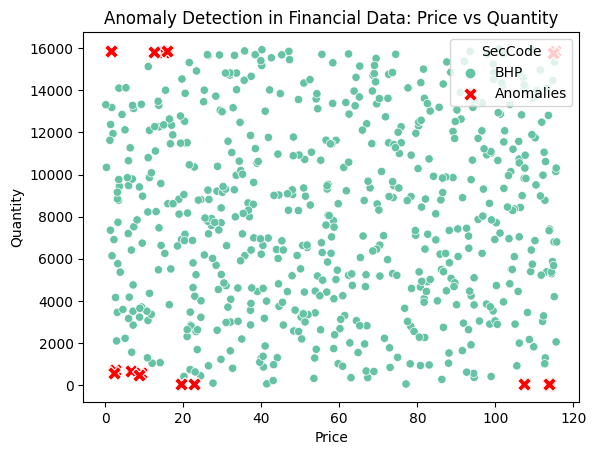

In [24]:
test = subset[subset['SecCode'] == 'BHP']

sns.scatterplot(
    x='Price', 
    y='Quantity', 
    hue='SecCode',
    data=test[test['anomaly'] == 1],
    palette='Set2',
    legend='full'
)

sns.scatterplot(
    x='Price', 
    y='Quantity', 
    data=test[test['anomaly'] == -1],
    color='red',
    marker='X',
    s=100,
    label='Anomalies'
)

plt.title('Anomaly Detection in Financial Data: Price vs Quantity')
plt.xlabel('Price')
plt.ylabel('Quantity')
plt.legend(title='SecCode', loc='upper right')
plt.show()

### all relevant columns

In [38]:
all_columns = discrete_columns_to_analyze + continuous_columns_to_analyze
subset = df[all_columns]
features = pd.get_dummies(subset, columns=discrete_columns_to_analyze)
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
model.fit(features)
features['anomaly'] = model.predict(features)
subset['anomaly'] = features['anomaly']
anomalies = features[features['anomaly'] == -1]
print(f"Number of Anomalies Detected: {len(anomalies)}")
print(anomalies)

Number of Anomalies Detected: 50
      Quantity       Price         Value  DoneVolume  DoneValue  AccID_1  \
55        6039    0.986127  7.483427e+05       12046     567017    False   
216      14121   22.788889  1.302308e+06        5611    1016625    False   
232        118    6.696366  1.255988e+06        6929     183531    False   
258      11247    5.420944  1.298821e+06        9602    1292304    False   
264       1509   32.011694  1.295319e+06         727      33640    False   
357       3870   49.115328  4.359715e+05       14945     752101    False   
415       1901    8.614892  2.619266e+05        8816     604304    False   
741        296    4.479510  4.017214e+05       12249     488552    False   
1007      7911   33.742432  2.321776e+05       15113      95006    False   
1073     13135   99.605373  2.213834e+05        9586    1195448    False   
1106      8578    7.313438  8.047215e+05        3365    1088911    False   
1138       508   43.411371  5.870721e+05        1928   

C:\Users\david\AppData\Local\Temp\ipykernel_28108\2056898325.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['anomaly'] = features['anomaly']
